In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

In [2]:
ORGANISMS = [3702]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERM = "sugar transmembrane transporter activity"
# GO_TERM = "amino acid transmembrane transporter activity",
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_at_sugarvsrest"
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # If false, use cached results, e.g. to create more plots

## Full dataset

In [3]:
dataset_unfiltered = get_transmembrane_transporter_dataset(  # yeast
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [4]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [5]:
from subpred.dataset_filters import get_proteome_classification_subset

dataset_organism = get_proteome_classification_subset(
    dataset_full=dataset_organism, go_term=GO_TERM
)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    388
sugar transmembrane transporter activity           32
Name: count, dtype: int64

In [6]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
!!NOT|sugar transmembrane transporter activity    386
sugar transmembrane transporter activity           32
Name: count, dtype: int64

Clustering at 70%

In [7]:
from subpred.dataset_filters import cluster_sequences

dataset_organism = cluster_sequences(
    dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD
)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 418 sequences into 342 clusters at threshold 70


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    316
sugar transmembrane transporter activity           26
Name: count, dtype: int64

## Feature generation

In [8]:
from subpred.features import get_features

features_list, series_labels = get_features(
    dataset_full=dataset_organism, include_pssm_features=False
)

2025-05-29 02:50:38.086832: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 02:50:38.094503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748479838.100351   11901 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748479838.102374   11901 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 02:50:38.110262: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [9]:
from subpred.features import get_ml_datasets

ml_datasets = get_ml_datasets(features_list=features_list, series_labels=series_labels)
ml_datasets

[('DUMMY',
  array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.6204999 , 0.63962224,
          0.9485403 ],
         [0.77827617, 0.84834527, 0.49041991, ..., 0.94382759, 0.68678337,
          0.28757538],
         [0.76899892, 0.08316477, 0.97477442, ..., 0.40850912, 0.08875799,
          0.55057892],
         ...,
         [0.4884459 , 0.35452363, 0.4443116 , ..., 0.83628479, 0.56133432,
          0.35848567],
         [0.23086892, 0.13270462, 0.83262941, ..., 0.26779029, 0.18243   ,
          0.69146333],
         [0.81084506, 0.24860643, 0.49328833, ..., 0.20270607, 0.00419284,
          0.05594515]], shape=(342, 1024)),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

did the class assignment work correctly?

In [10]:
from collections import Counter

for feature_name, X, y, sample_names, feature_names in ml_datasets:
    assert (
        Counter(y)[0]
        == dataset_organism[1].go_term_ancestor.value_counts()[f"!!NOT|{GO_TERM}"]
    )
    assert Counter(y)[1] == dataset_organism[1].go_term_ancestor.value_counts()[GO_TERM]

In [11]:
# saving as pickle, to load in different notebook with different env,
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle

with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", "wb") as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [12]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism, ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor


## Model evaluation SVM

In [13]:
ml_datasets = [
    (feature_name, X, y, sample_names, feature_names)
    for feature_name, X, y, sample_names, feature_names in ml_datasets
    if "KMER3" not in feature_name and "T5" not in feature_name
    # if feature_name == "AAC"
]  # removing kmer3 and embedding features because they take too long

In [14]:
for feature_name, X, y, sample_names, feature_names in ml_datasets:
    print(feature_name)

DUMMY
AAC
PAAC
3Di_COMP
3Di_KMER2
COMB_KMER1
COMB_KMER2


In [ ]:
from sklearn.metrics import fbeta_score, make_scorer

fbeta_score.__name__

f2 = make_scorer(fbeta_score, pos_label=1, beta=2)  # TODO try 1.5

In [23]:
from subpred.evaluation import (
    get_svm_results,
    plot_results_long,
    summarize_results_long,
)

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    repeats=10,
    n_jobs_inner=-1,
    n_jobs_outer=1,
    scoring_inner="f1",  # of positive class
    scoring_outer=["balanced_accuracy", "precision", "recall", "f1", "f1_macro"],
)

=== DUMMY ===


/home/andy/miniforge3/envs/subpred_deeplearning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/andy/miniforge3/envs/subpred_deeplearning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


balanced_accuracy: 0.53+-0.10
precision: 0.10+-0.10
recall: 0.25+-0.23
f1: 0.13+-0.11
f1_macro: 0.49+-0.08
=== AAC ===
balanced_accuracy: 0.82+-0.10
precision: 0.56+-0.18
recall: 0.69+-0.20
f1: 0.60+-0.15
f1_macro: 0.78+-0.08
=== PAAC ===
balanced_accuracy: 0.90+-0.08
precision: 0.69+-0.18
recall: 0.84+-0.17
f1: 0.74+-0.13
f1_macro: 0.86+-0.08
=== 3Di_COMP ===
balanced_accuracy: 0.90+-0.07
precision: 0.59+-0.13
recall: 0.86+-0.14
f1: 0.69+-0.11
f1_macro: 0.83+-0.06
=== 3Di_KMER2 ===
balanced_accuracy: 0.93+-0.07
precision: 0.86+-0.14
recall: 0.87+-0.15
f1: 0.85+-0.10
f1_macro: 0.92+-0.05
=== COMB_KMER1 ===
balanced_accuracy: 0.83+-0.09
precision: 0.75+-0.19
recall: 0.69+-0.19
f1: 0.70+-0.14
f1_macro: 0.84+-0.08
=== COMB_KMER2 ===
balanced_accuracy: 0.90+-0.10
precision: 0.89+-0.15
recall: 0.81+-0.19
f1: 0.82+-0.13
f1_macro: 0.90+-0.07


In [24]:
summarize_results_long(df_results_long=df_results_long)


Mean    Median      Sdev
Feature    Metric                                         
3Di_COMP   balanced_accuracy  0.903461  0.892460  0.069475
           f1                 0.688471  0.714286  0.108487
           f1_macro           0.827529  0.841014  0.060685
           precision          0.587662  0.571429  0.131495
           recall             0.860667  0.816667  0.139271
3Di_KMER2  balanced_accuracy  0.927566  0.938802  0.075415
           f1                 0.848795  0.888889  0.101961
           f1_macro           0.918051  0.940507  0.055025
           precision          0.863643  0.833333  0.136807
           recall             0.869333  0.916667  0.156179
AAC        balanced_accuracy  0.820675  0.834921  0.097553
           f1                 0.599975  0.615385  0.150608
           f1_macro           0.780672  0.787367  0.081940
           precision          0.560096  0.500000  0.182961
           recall             0.692000  0.733333  0.197554
COMB_KMER1 balanced_accuracy  0.834308  0.829365  0.091675
           f1                 0.695847  0.727273  0.143543
           f1_macro           0.835356  0.851636  0.077687
           precision          0.750455  0.775000  0.189847
           recall             0.693333  0.666667  0.187355
COMB_KMER2 balanced_accuracy  0.898993  0.900000  0.096919
           f1                 0.823930  0.833333  0.135899
           f1_macro           0.904994  0.908666  0.073497
           precision          0.887262  1.000000  0.152916
           recall             0.810000  0.800000  0.195441
DUMMY      balanced_accuracy  0.530003  0.525397  0.097552
           f1                 0.132057  0.137931  0.112808
           f1_macro           0.494184  0.479094  0.075768
           precision          0.101913  0.090909  0.096176
           recall             0.252000  0.200000  0.233203
PAAC       balanced_accuracy  0.900379  0.900794  0.083673
           f1                 0.736972  0.727273  0.135000
           f1_macro           0.855022  0.851636  0.075890
           precision          0.694497  0.714286  0.182240
           recall             0.840000  0.833333  0.172615

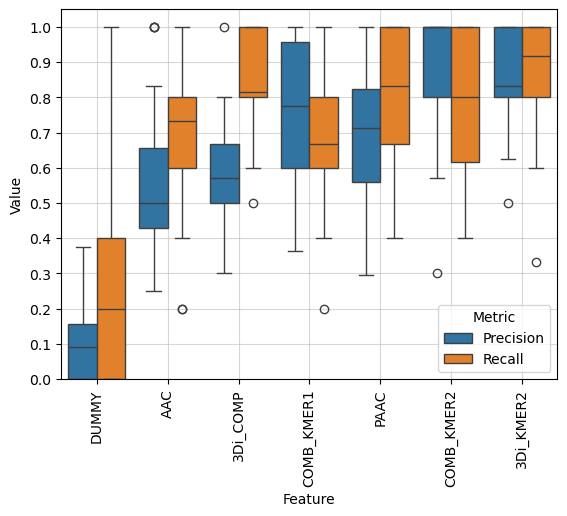

In [25]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["precision", "recall"]
)

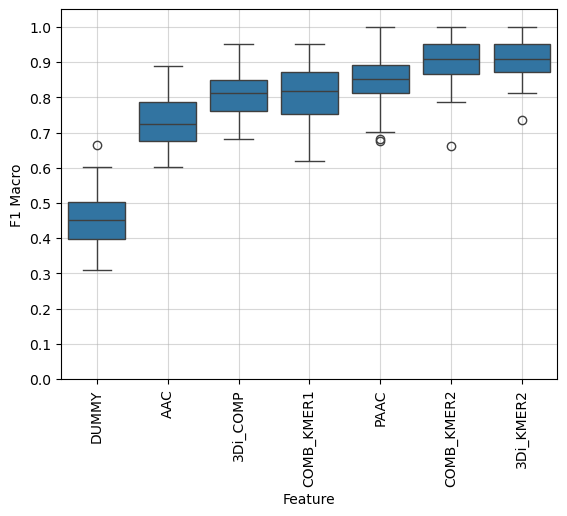

In [19]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["f1_macro"]
)